# Pyber Ride-Share Vizualizations

In [49]:
%matplotlib inline

In [50]:
# Start madness
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Load Files
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [51]:
# Combine the data into a single dataset
combined_city_ride_df = pd.merge(city_df, ride_df, how='left', on='city')

In [52]:
#combined_city_ride_df["type"].unique()    #investigate all of our types
all_rides_count = len(combined_city_ride_df)
all_rides_count

2375

## Bubble Plot of Ride Sharing Data

In [53]:
#Urban DF
selection  = combined_city_ride_df["type"]=="Urban"
urban_df = combined_city_ride_df.loc[selection, :]
#urban_df.head()

In [66]:
#Data Frames: Three because we need to do something we've never done before during class because everyone in the class has a programming background except the dude that might have to pay back his employer 7,500 because he sometimes has no idea what's going on about 48% of the time.

#build 3 separate ones in order
#create an Urban DF   look for occurrences of Urban in type to make an urban df
selection  = combined_city_ride_df["type"]=="Urban"
urban_df = combined_city_ride_df.loc[selection, :]
urban_df.head()
#compute avg fare per city  Y  (series)
avg_fare_by_city_urban = urban_df.groupby("city")["fare"].mean()
#avg_fare_by_city_urban.head(10)

#compute total count for rides in a city  X   (series)  
city_ride_tot_count_urban = urban_df.groupby("city")["city"].count()
#city_ride_tot_count.head(10)

#compute driver count per city (circle size)   (series)
driver_count_per_city_urban = urban_df.groupby("city")["driver_count"].max()     
#driver_count_per_city.head(10)

#create an Suburban DF   look for occurrences of Suburban in type to make an suburban df
selection  = combined_city_ride_df["type"]=="Suburban"
suburban_df = combined_city_ride_df.loc[selection, :]
#suburban_df.head()

#compute avg fare per city Y  (series)
avg_fare_by_city_sub = suburban_df.groupby("city")["fare"].mean()
#avg_fare_by_city.head(10)

#compute total count for rides in a city  X   (series)  
city_ride_tot_count_sub = suburban_df.groupby("city")["city"].count()
#city_ride_tot_count.head(10)

#compute driver count per city (circle size)   (series)
driver_count_per_city_sub = suburban_df.groupby("city")["driver_count"].max()     
#driver_count_per_city.head(10)

In [67]:
#create an Rural DF   look for occurrences of Rural in type to make an rural df
selection  = combined_city_ride_df["type"]=="Rural"
rural_df = combined_city_ride_df.loc[selection, :]
#rural_df.head()

#compute avg fare per city   Y   (series)
avg_fare_by_city_rural = rural_df.groupby("city")["fare"].mean()
#head
#compute total count for rides in a city   X     (series)  
city_ride_tot_count_rural = rural_df.groupby("city")["city"].count()
#head
#compute driver count per city (circle size)   (series)
driver_count_per_city_rural = rural_df.groupby("city")["driver_count"].max()     
#head

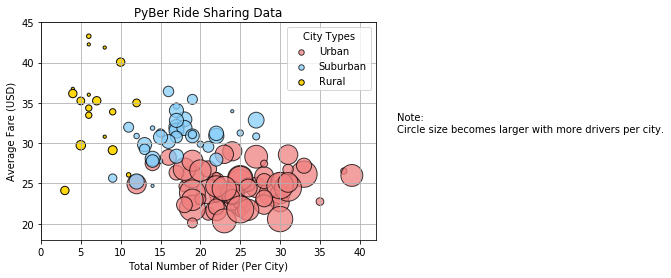

In [68]:
#define a bubble plot size scalar to make sizes differentiable
bubble_size_scalar = 10

# Build the scatter plots for each city types
plt.scatter(city_ride_tot_count_urban, avg_fare_by_city_urban, marker = "o", s=driver_count_per_city_urban*bubble_size_scalar, facecolors='#F08080', edgecolor = "black", alpha=0.75, label = "Urban")
plt.scatter(city_ride_tot_count_sub, avg_fare_by_city_sub, marker = "o", s=driver_count_per_city_sub*bubble_size_scalar, facecolors='#87CEFA', edgecolor = "black", alpha=0.75, label = "Suburban")
plt.scatter(city_ride_tot_count_rural, avg_fare_by_city_rural, marker = "o", s=driver_count_per_city_rural*bubble_size_scalar, facecolors='#FFD700', edgecolor = "black", alpha=0.95, label = "Rural")


# Incorporate the other graph properties
plt.ylim(18,45)
plt.xlim(0,42)
plt.grid()

# Create a title, x label, and y label for our chart
plt.title("PyBer Ride Sharing Data")
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fare (USD)")

# Legend
lgnd = plt.legend(loc="best", numpoints=1, fontsize=10, title = "City Types")



#change the marker size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

                                                          
# notiation
textstr = "Note:\nCircle size becomes larger with more drivers per city."
plt.gcf().text(0.95, 0.5, textstr, fontsize=10)

# done-zo
plt.show()                    

In [69]:
def build_piechart(lookat):
    
    if lookat == "fare":
        total_lookat_amount = combined_city_ride_df[lookat].sum()
        urban_sum_amount = urban_df[lookat].sum()
        suburban_sum_amount = suburban_df[lookat].sum()
        rural_sum_amount = rural_df[lookat].sum()
        
    elif lookat == "ride":
        total_lookat_amount = len(combined_city_ride_df)
        urban_sum_amount = len(urban_df)
        suburban_sum_amount= len(suburban_df)
        rural_sum_amount  = len(rural_df)
        
    elif lookat == "driver":
        total_lookat_amount = city_df["driver_count"].sum()
        #df by city type
        driver_sum_df = city_df.groupby(["type"])[["driver_count"]].sum()
        #driver counts
        urban_sum_amount = driver_sum_df.loc["Urban", "driver_count"] 
        suburban_sum_amount = driver_sum_df.loc["Suburban", "driver_count"] 
        rural_sum_amount = driver_sum_df.loc["Rural", "driver_count"] 
   
    # Calculate % per type
    urban_pct = urban_sum_amount / total_lookat_amount
    suburban_pct = suburban_sum_amount / total_lookat_amount
    rural_pct = rural_sum_amount / total_lookat_amount

    attribute_df = pd.DataFrame(
        {"Type": ["Urban", "Suburban", "Rural"],
         "Percent": [urban_pct, suburban_pct, rural_pct],
         "ColorCode": ['#F08080', '#87CEFA', '#FFD700']
        }
    )
    attribute_df.head()

    attribute_sorted_df = attribute_df.sort_values(["Percent"], ascending = False)

    #add a series pie chart
    attribute_sorted_df["Explode Value"] = [0.1, 0, 0]

    attribute_sorted_df.head()    #done pack of data

    #add a series to this sorted df that will be our explode order for pie chart
    attribute_sorted_df["Explode Value"] = [0.1, 0, 0]

    attribute_sorted_df.head() 

    #Pie Chart_
    
    labels = [attribute_sorted_df.iloc[0,0], attribute_sorted_df.iloc[1,0],attribute_sorted_df.iloc[2,0]]

    #values for each section of the pie chart
    #sizes.. = [urban_pct, suburban_pct, rural_pct]
    sizes = [attribute_sorted_df.iloc[0,1], attribute_sorted_df.iloc[1,1],attribute_sorted_df.iloc[2,1]]
    #colors pie chart
    #colors are"#F08080","#87CEFA","#FFD700"
    colors = [attribute_sorted_df.iloc[0,2], attribute_sorted_df.iloc[1,2],attribute_sorted_df.iloc[2,2]]

    #explode big slice thanks for the help!
    type1_explode_val = attribute_sorted_df.iloc[0,3]
    type2_explode_val = attribute_sorted_df.iloc[1,3]
    type3_explode_val = attribute_sorted_df.iloc[2,3]
    explode = (type1_explode_val,type2_explode_val,type3_explode_val)

    # Pie chart on values above
    # autopct nice func
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=240)
    # Equalize the Axes
    plt.axis("equal")

    # Create a title for chart
    #capitalize that stuff
    
    caplookat = lookat.capitalize()
    titlestr = "% Of Total " + caplookat + "s By City Type"
    plt.title(titlestr)
 
    # I'm not gonna save it cause it broke my plots everytime I tried figuring out a save function
    # Show pies below, now I'm hungry.
    plt.show()


## Total Fares by City Type

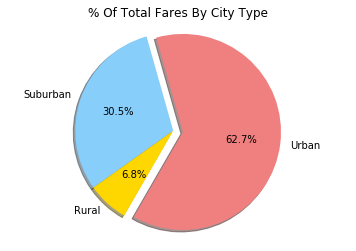

In [70]:
build_piechart("fare")

## Total Rides by City Type

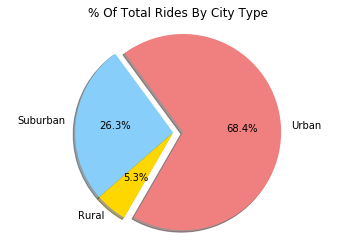

In [71]:
build_piechart("ride")

## Total Drivers by City Type

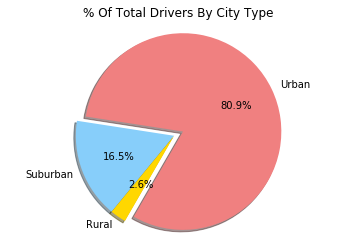

In [72]:
build_piechart("driver")

* If you look at the fundamental layout of society, it's something like 55% of all mankind lives within an urban area, I'd venture so far to say that 75% lives within a suburban setting. As such, this would lead to shorter commutes, shorter travel distances, and more access to labor, along with cheaper rides. This chart shows that around 75% of all the drivers are also located within the urban area. The other 20-25% of the rides are both combined of the suburban and rural areas. Demand for rides in more populated areas would make sense as does any economy. 

* So it's not profitable, it's expensive, and you have to drive out of your way where common commodities are. Literally there are no anomolies in our data set, that would constitute rethinking the way we would see any sort of private ride share or even a public transportation system. Even the outliers can be explained by any stretch of the imagination. Maybe a farmer wanted to go see the city for a weekend or vice-versa. The urban areas also have a considerably higher driver count (80% of all drivers) than the other two regions, where suburb and rural fares consisted of only 20% of the total rides.  Again, this is logical, given that the demand for rides would be higher in a more population-dense region.

* Concluding that ride distance is the big factor to fare as shown in the chart, any sort of comparison of Fare VS Miles by region type would be a solid comparison and may show why exactly no one in the suburban or rural areas uses ride share as often. If this were the case there could even be a formula made to still incentivise farther commuters.